### Imports

In [17]:
pip install tensorflow-datasets


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
    --------------------------------------- 0.1/5.1 MB 787.7 kB/s eta 0:00:07
   - -------------------------------------- 0.2/5.1 MB 1.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.3/5.1 MB 2.6 MB/s eta 0:00:02
   ----- ---------------------------------- 0.7/5.1 MB 3.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.1/5.1 MB 4.3 MB/s eta 0:00:01
   -------------- ------------------------- 1.9/5.1 MB 6.0 MB/s eta 0:00:01
   --------------- ------------------------ 1.9/5.1 MB 5.4 MB/s eta 0:00:01
   ------------------- -------------------- 2.5/5.1 MB 6.3 MB/s eta 0:00:01
   ------------------------ --------------- 3.1/5.1 MB 6.9 MB/s eta 0:00

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.28.2 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.28.2 which is incompatible.


In [19]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

### Load Data

Explore more about datset: https://www.tensorflow.org/datasets/catalog/tf_flowers

In [25]:
## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load("tf_flowers",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True,  # Include labels
)

### Image Preprocessing

In [28]:
train_ds[0].shape      # Size of each img

TensorShape([442, 1024, 3])

In [30]:
# Resizing images ( 150x150 px )
train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

In [32]:
train_labels  # print labels given for train dataset

<tf.Tensor: shape=(2569,), dtype=int64, numpy=array([2, 3, 3, ..., 0, 2, 0], dtype=int64)>

In [34]:
test_labels  # print labels given for test dataset

<tf.Tensor: shape=(1101,), dtype=int64, numpy=array([2, 3, 3, ..., 2, 4, 2], dtype=int64)>

In [36]:
## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

In [38]:
train_labels[0]
# dandelion - 0
#
# tulips - 2
# sunflowers - 3
# roses - 4

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

### Use Pretrained VGG16 Image Classification model

# **Load a pre-trained CNN model trained on a large dataset**

In [42]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [44]:
train_ds[0].shape

TensorShape([150, 150, 3])

In [46]:
## Loading VGG16 model - imagenet dataset , not include FC 6,7,8
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_ds[0].shape)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


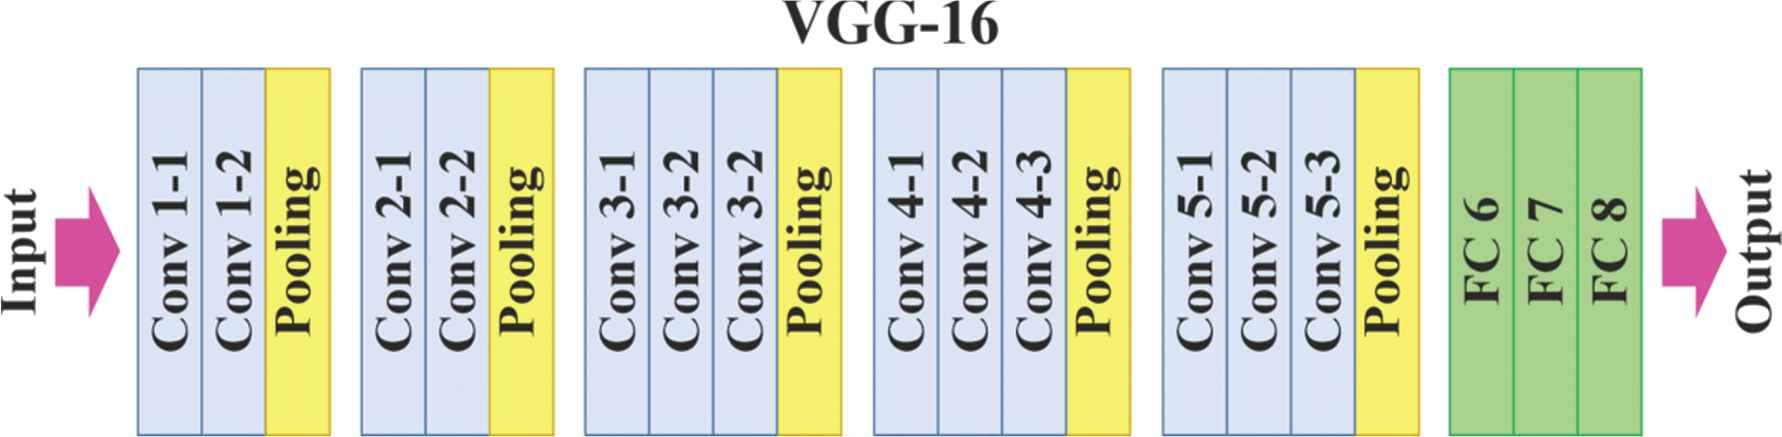

In [49]:
## will not train base mode Convo & pool (Non- trainable layers)
base_model.trainable = False 

In [51]:
## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

In [53]:
## model details
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

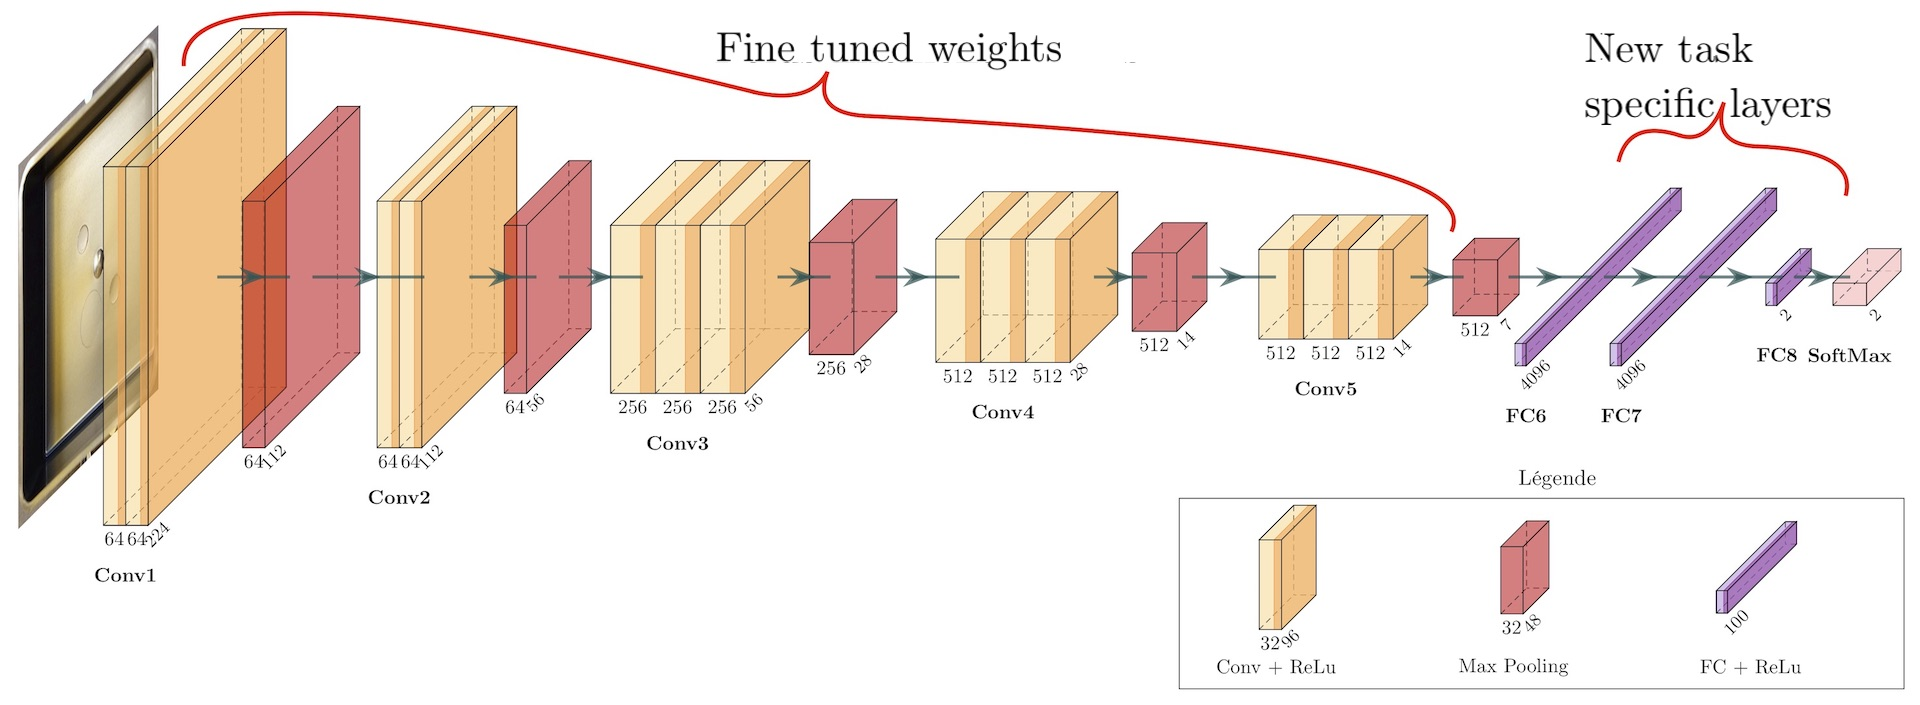

**Add custom classifier with two dense layers of trainable parameters to model**

In [57]:
# add our layers on top of this model for our task replcing FC 6,7,8
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

# base model (all conv & pool) + replced FC layer
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

**Train classifier layers on training data available for task**

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [62]:
# EarlyStopping based on max accuracy
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [64]:
history=model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32, callbacks=[es])  # 20% test 80% train

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.3717 - loss: 2.7941 - val_accuracy: 0.5428 - val_loss: 1.2145
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.6527 - loss: 0.9348 - val_accuracy: 0.6070 - val_loss: 1.0791
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.7839 - loss: 0.5983 - val_accuracy: 0.6634 - val_loss: 1.0091
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8590 - loss: 0.4164 - val_accuracy: 0.6848 - val_loss: 0.9705
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8745 - loss: 0.3797 - val_accuracy: 0.6926 - val_loss: 1.0070
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.9108 - loss: 0.2468 - val_accuracy: 0.6712 - val_loss: 1.0906
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9261 - loss: 0.2145 - val_accuracy: 0.7004 - val_loss: 1.0864
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9452 - loss: 0.1542 - val_accuracy: 0.7043 - v

In [66]:
los,accurac=model.evaluate(test_ds,test_labels)
print("Loss: ",los,"Accuracy: ", accurac)

35/35 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9693 - loss: 0.0727
Loss:  0.06812980026006699 Accuracy:  0.9782016277313232


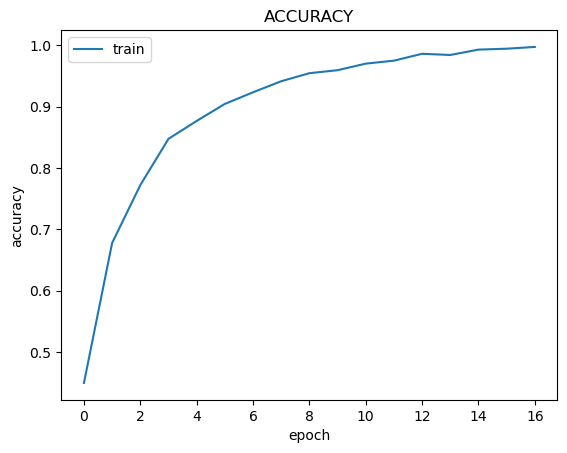

In [68]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [70]:
import numpy as np
import pandas as pd
y_pred = model.predict(test_ds)
y_classes = [np.argmax(element) for element in y_pred]
#to_categorical(y_classes, num_classes=5)
#to_categorical(test_labels, num_classes=5)
print(y_classes[:10])
print("\nTest")
print(test_labels[:10])

35/35 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step
[2, 3, 3, 4, 3, 0, 0, 0, 0, 2]

Test
tf.Tensor(
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]], shape=(10, 5), dtype=float32)


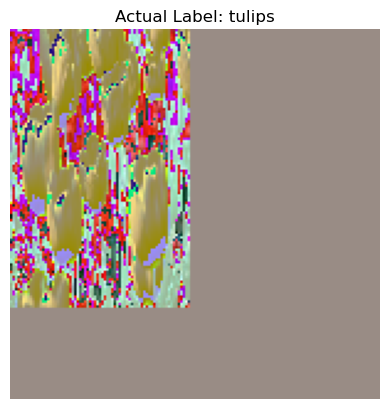

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
dandelion: 0.0000
daisy: 0.0000
tulips: 1.0000
sunflowers: 0.0000
roses: 0.0000

Predicted Label: tulips
Actual Label: tulips
Prediction is correct!


In [71]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Mapping labels to flower names (as per the dataset categories)
flower_classes = ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

# Select a random test image (e.g., index 0)
test_image_index = 0
test_image = test_ds[test_image_index].numpy()  # Convert EagerTensor to numpy array
test_label = test_labels[test_image_index]

# Show the image
plt.imshow(test_image.astype("uint8"))  # Use numpy's astype
plt.title("Actual Label: " + flower_classes[np.argmax(test_label)])
plt.axis('off')  # Hide axes
plt.show()

# Predict the label for the test image
test_image_expanded = np.expand_dims(test_image, axis=0)  # Expand dims for batch
y_pred = model.predict(test_image_expanded)

# Print the predicted probabilities for each class
for i, class_name in enumerate(flower_classes):
    print(f"{class_name}: {y_pred[0][i]:.4f}")

# Show predicted result
predicted_class = np.argmax(y_pred[0])
print(f"\nPredicted Label: {flower_classes[predicted_class]}")

# Actual class
actual_class = np.argmax(test_label)
print(f"Actual Label: {flower_classes[actual_class]}")

# Show if prediction was correct
if predicted_class == actual_class:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect.")

